## **Problem Statement**
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

# Features
R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit -- profit of each state in the past few years

Importing Llibraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv


In [6]:
# import some data to play with
Startups = pd.read_csv('50_Startups.csv')


In [7]:
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
Startups.shape

(50, 5)

In [9]:
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
Startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
Startups[Startups.values==0.0]

,R&D Spend,Administration,Marketing Spend,State,Profit
19,86419.70,153514.11,0.00,New York,122776.86
47,0.00,135426.92,0.00,California,42559.73
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [13]:

print('Zero Values in R&D Spend is',(Startups['R&D Spend'] == 0).sum(),'\n'
      'Zero Values in Administration is',(Startups['Administration'] == 0).sum(),'\n'
      'Zero Values in Marketing Spend is',(Startups['Marketing Spend'] == 0).sum(),'\n'
      'Zero Values in Profit is',(Startups['Profit'] == 0).sum())

Zero Values in R&D Spend is 2 
Zero Values in Administration is 0 
Zero Values in Marketing Spend is 3 
Zero Values in Profit is 0


In [14]:
Startups[Startups.duplicated()].shape

(0, 5)

In [15]:
Startups[Startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


### Visualizing Continuous Datatype for Outlier Detection

In [16]:
continuous_feature=[feature for feature in Startups.columns if Startups[feature].dtype!='O']
continuous_feature

['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']

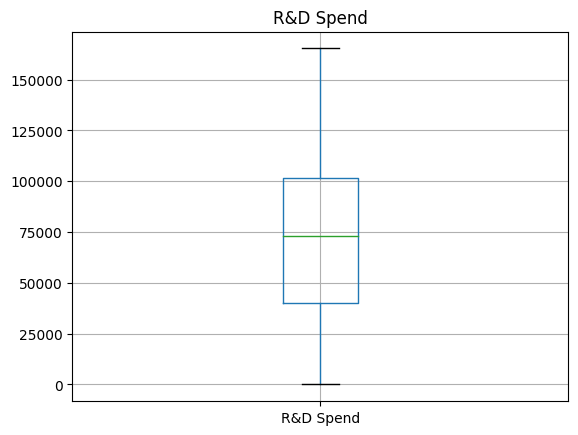

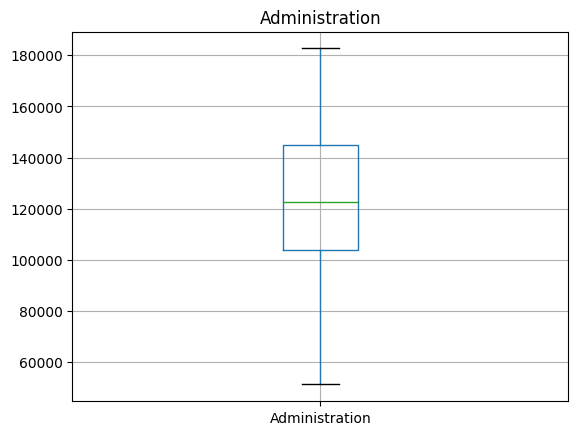

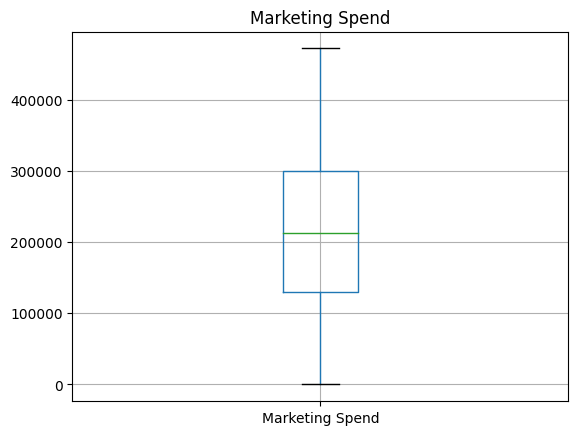

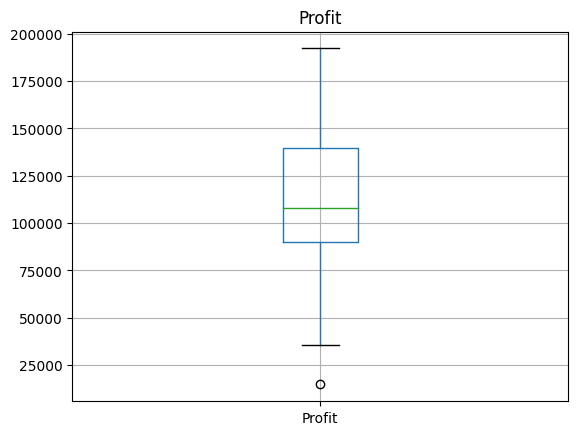

In [17]:
import matplotlib.pyplot as plt
for feature in continuous_feature:
    data=Startups.copy()
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()

There is an outlier in the profit that is our Depandent variable but there are no outlier in the dependent features.


### Let's try to find the Outliers in the Profit Dependent Variable

Note: Transforming variables can also eliminate outliers. The Transformed Variables reduces the variation caused by the extreme values

In [18]:
import numpy as np
Q1 = np.quantile(Startups.Profit,0.25)
Q3 = np.quantile(Startups.Profit,0.75)
med = np.median(Startups.Profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower_Whisker=',lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower_Whisker= 15698.290000000023


In [19]:
Outliers = Startups.Profit[(Startups.Profit <= lower_bound) | (Startups.Profit >= upper_bound)]
print('The outlier in the boxplot:',Outliers)

The outlier in the boxplot: 49    14681.4
Name: Profit, dtype: float64


In [20]:
display(Startups[Startups.index.isin([49])],Startups.head())

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


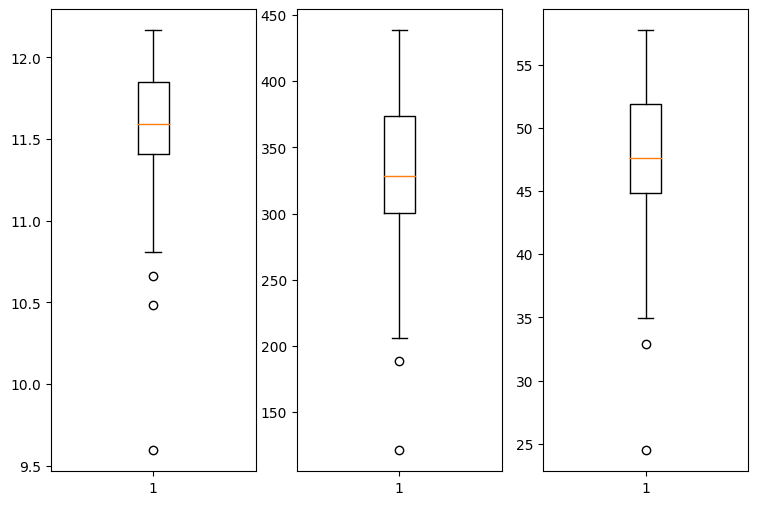

In [21]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(Startups['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(Startups['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(Startups['Profit']));

Before handling Outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Assuming Startups is your DataFrame
formula = "Profit ~ Q('R&D Spend') + Administration + Q('Marketing Spend')"
raw_model = smf.ols(formula, data=Startups).fit()
raw_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        12:57:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Q('R&D Spend')           0.8057      0.045     17.846      0.000       0.715       0.897
Administration          -0.0268      0.051     -0.526      0.602      -0.130       0.076
Q('Marketing Spend')     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Finding rsquared values
raw_model.rsquared , raw_model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Let's try Median Imputation to handle Outlier in Profit

In [24]:
Startups.Profit.median()

107978.19

Text(0.5, 1.0, 'Profit before median imputation')

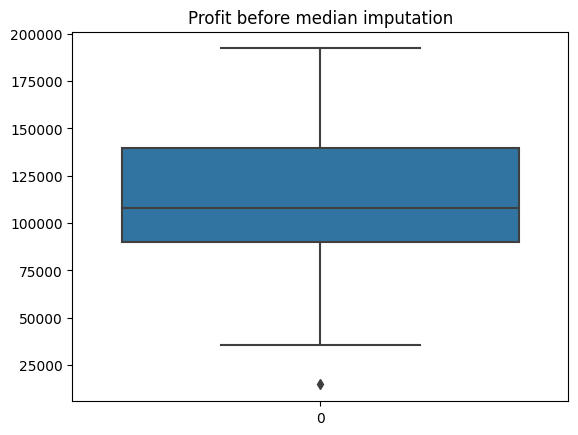

In [25]:
df1=Startups.copy()
sns.boxplot(Startups['Profit'])
plt.title('Profit before median imputation')

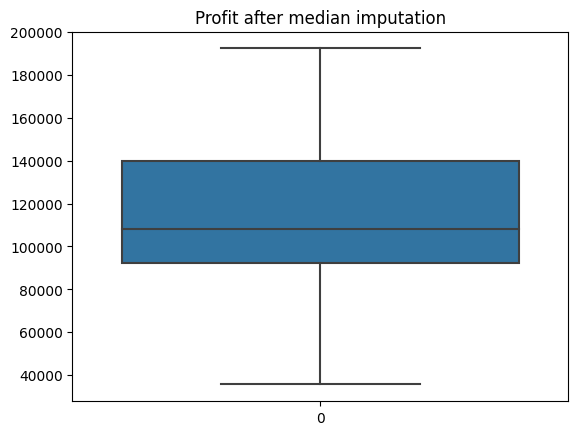

In [26]:
for i in df1['Profit']:
    q1 = np.quantile(Startups.Profit,0.25)
    q3 = np.quantile(Startups.Profit,0.75)
    med = np.median(Startups.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['Profit'] = df1['Profit'].replace(i, np.median(df1['Profit']))
sns.boxplot(df1['Profit'])
plt.title('Profit after median imputation')
plt.show()

Let's test our data in model and compare the R-squared with Median imputation data model

In [27]:
import statsmodels.formula.api as smf

# Assuming df1 is your DataFrame
formula = "Profit ~ Q('R&D Spend') + Administration + Q('Marketing Spend')"
after_median_imputation_model = smf.ols(formula, data=df1).fit()
after_median_imputation_model.summary()

# Finding rsquared values
#rsquared_value = after_median_imputation_model.rsquared
#rsquared_adj_value = after_median_imputation_model.rsquared_adj

#print("R-squared:", rsquared_value)
#print("Adjusted R-squared:", rsquared_adj_value)




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           5.06e-25
Time:                        12:57:30   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
Q('R&D Spend')           0.7472      0.055     13.707      0.000       0.638       0.857
Administration          -0.0149      0.062     -0.242      0.810      -0.139       0.109
Q('Marketing Spend')     0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let's try Mean Imputation to handle Outlier in Profit

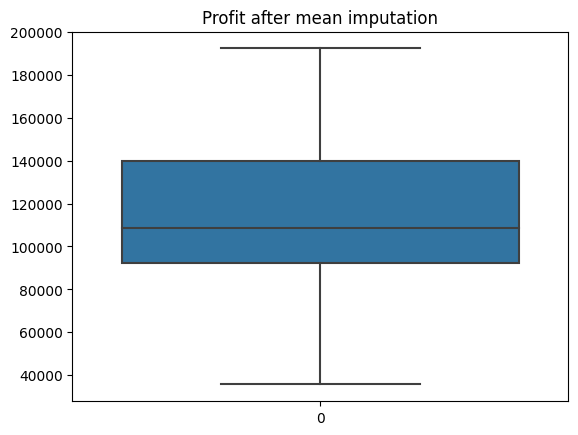

In [28]:
df2=Startups.copy()
for i in df2['Profit']:
    q1 = np.quantile(df2.Profit,0.25)
    q3 = np.quantile(df2.Profit,0.75)
    med = np.median(df2.Profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df2['Profit'] = df2['Profit'].replace(i, np.mean(df2['Profit']))
sns.boxplot(df2['Profit'])
plt.title('Profit after mean imputation')
plt.show()

Let's test our data in model and compare the R-squared with Mean imputation data model

In [29]:

formula = "Profit ~ Q('R&D Spend') + Administration + Q('Marketing Spend')"
after_mean_imputation_model = smf.ols(formula, data=df2).fit()
after_mean_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.82e-24
Time:                        12:57:31   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
Q('R&D Spend')           0.7447      0.057     13.162      0.000       0.631       0.859
Administration          -0.0144      0.064     -0.226      0.823      -0.143       0.114
Q('Marketing Spend')     0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The best thing we can do is now to remove the outlier and see the results

In [30]:
df3=Startups.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

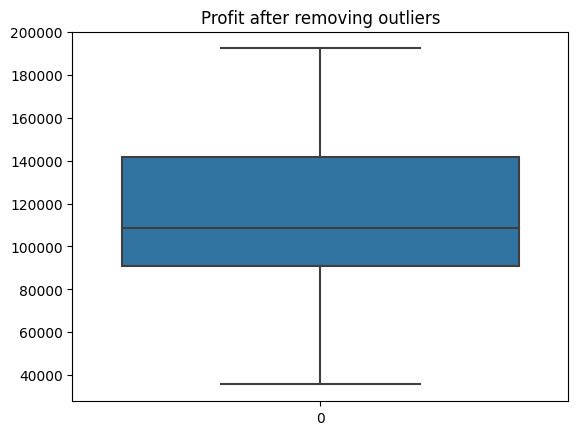

In [31]:
drop_outliers(df3, 'Profit')
sns.boxplot(df3.Profit)
plt.title('Profit after removing outliers')

Let's test our data in model and compare the R-squared with and without imputation data models

In [32]:

formula = "Profit ~ Q('R&D Spend') + Administration + Q('Marketing Spend')"
remove_outlier_model = smf.ols(formula, data=df3).fit()
remove_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        12:57:31   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
Q('R&D Spend')           0.7830      0.038     20.470      0.000       0.706       0.860
Administration          -0.0222      0.043     -0.518      0.607      -0.109       0.064
Q('Marketing Spend')     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Exploratory Data Anlaysis

Visualizing the Distribution of Independent Features with the help of Histograms

In [33]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)

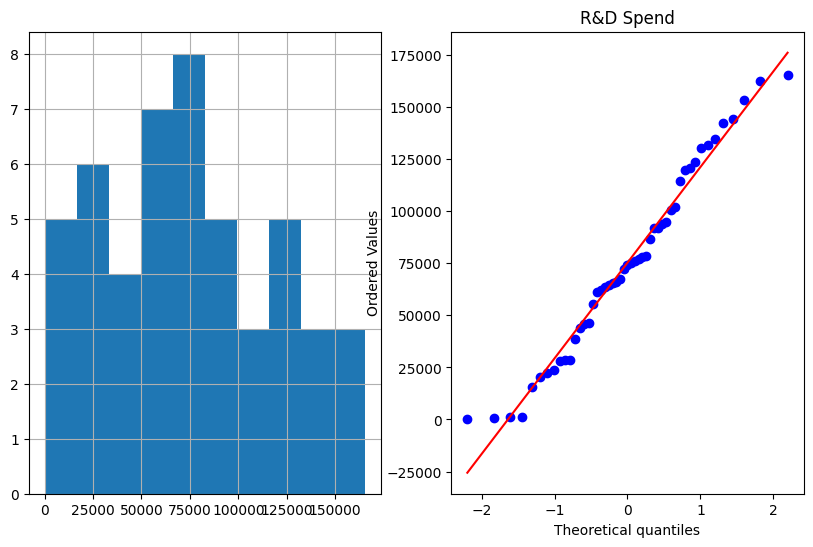

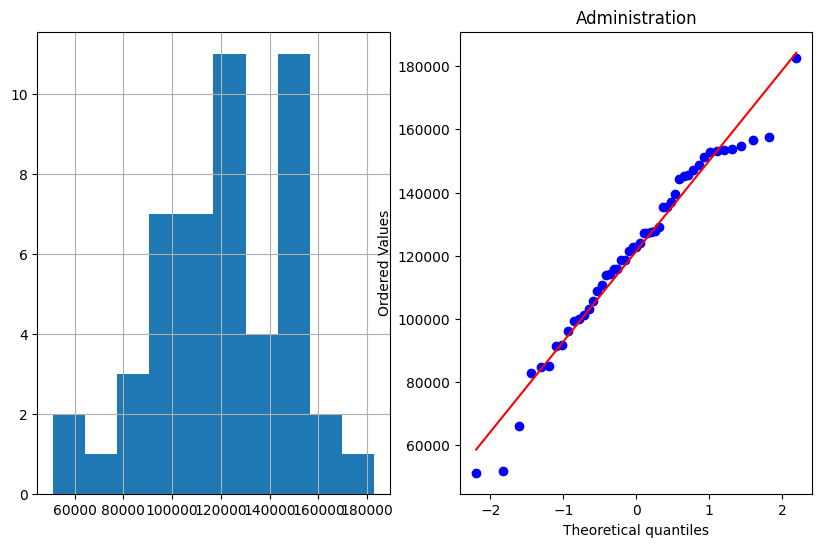

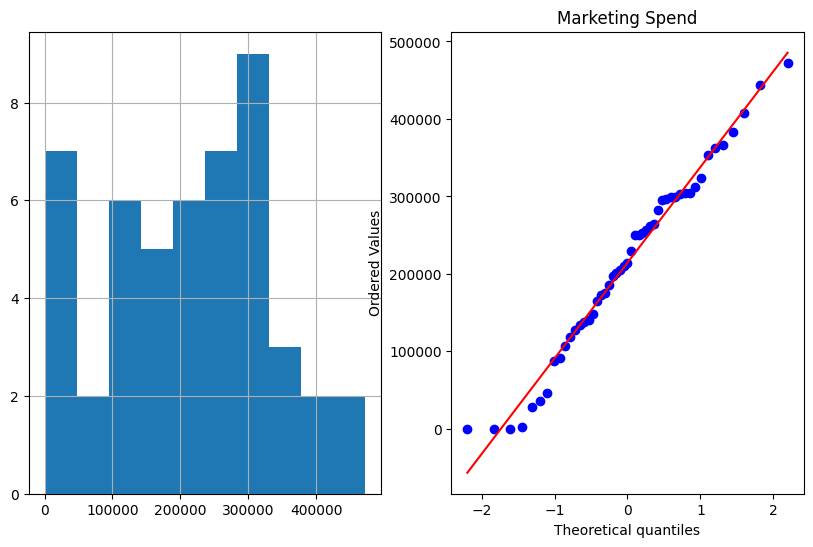

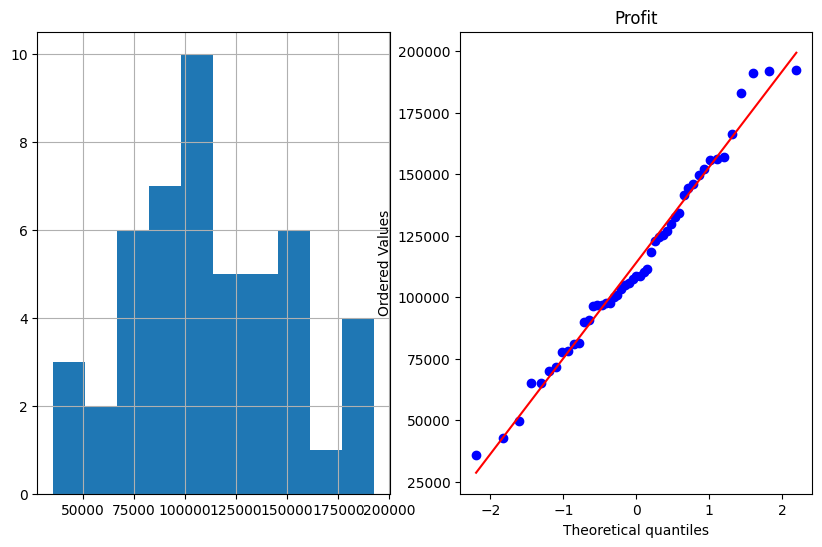

In [34]:
plot_data(df3,'R&D Spend')
plt.title('R&D Spend')
plot_data(df3,'Administration')
plt.title('Administration')
plot_data(df3,'Marketing Spend')
plt.title('Marketing Spend')
plot_data(df3,'Profit')
plt.title('Profit');

Text(0.5, 1.0, 'Profit')

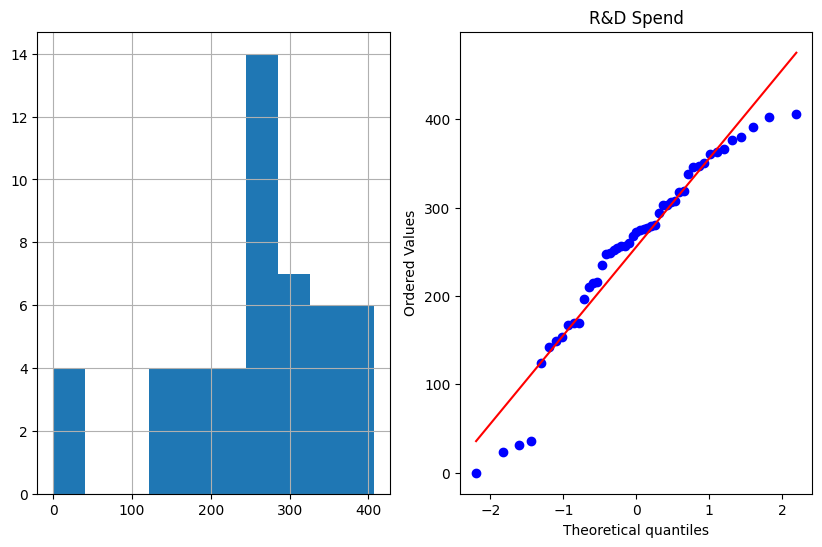

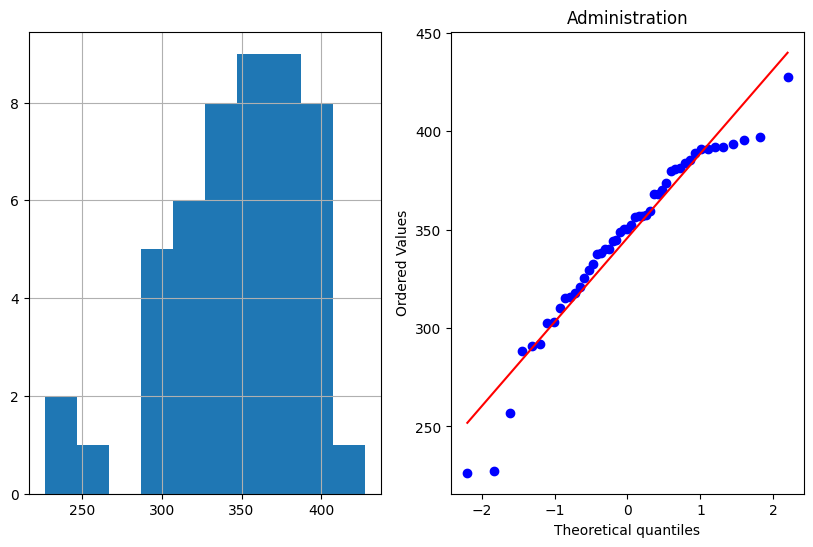

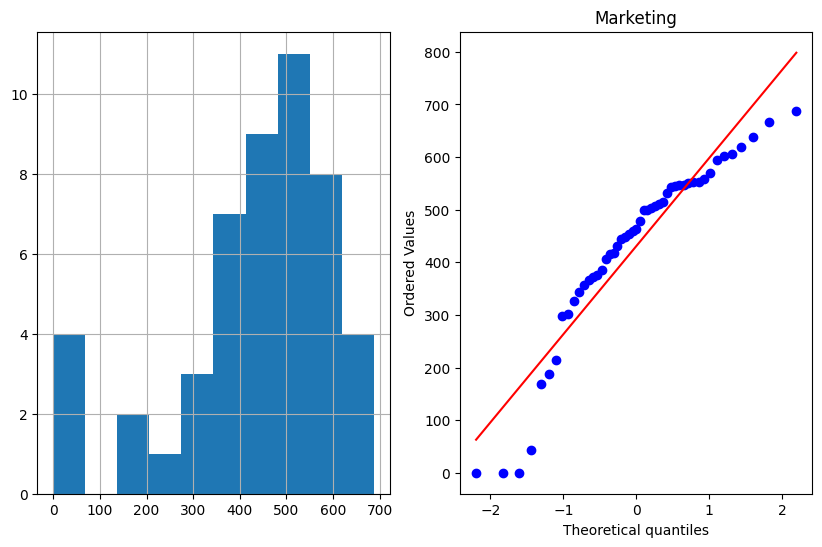

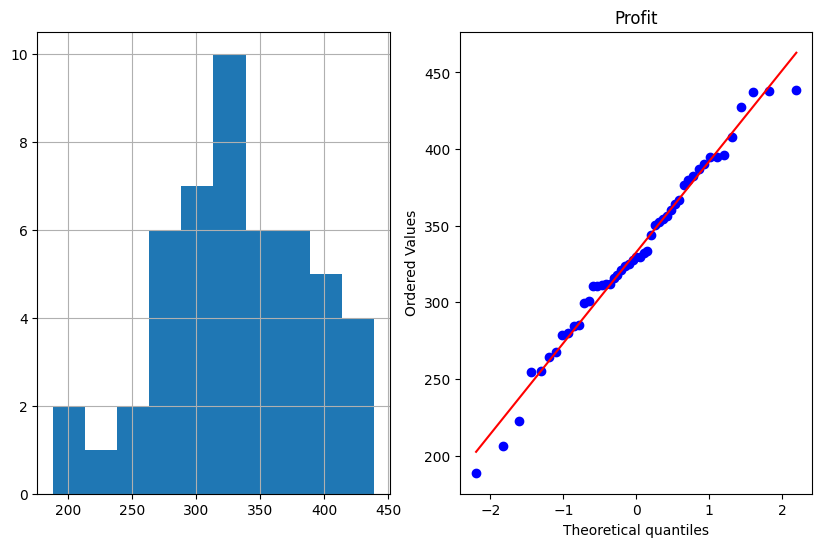

In [35]:
df_sqrt=df3.copy()
df_sqrt[continuous_feature]=np.sqrt(df_sqrt[continuous_feature])

plot_data(df_sqrt,'R&D Spend')
plt.title('R&D Spend')
plot_data(df_sqrt,'Administration')
plt.title('Administration')
plot_data(df_sqrt,'Marketing Spend')
plt.title('Marketing')
plot_data(df_sqrt,'Profit')
plt.title('Profit')

Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Profit')

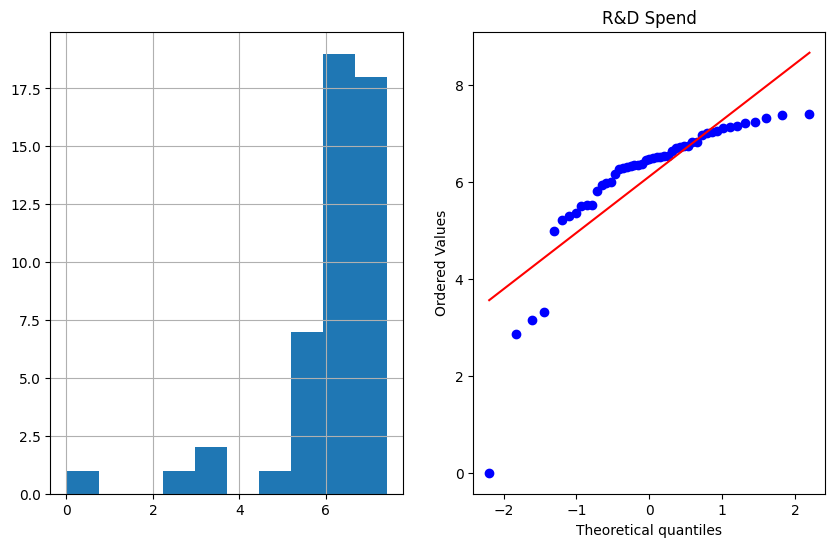

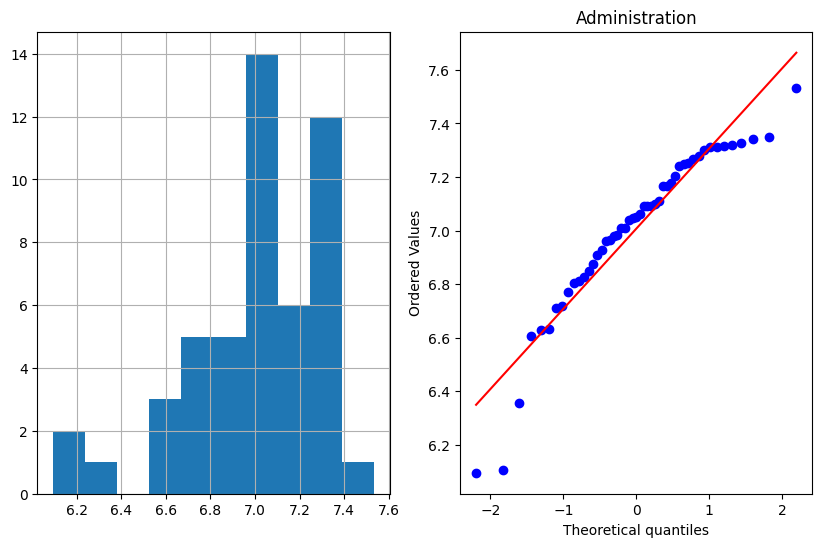

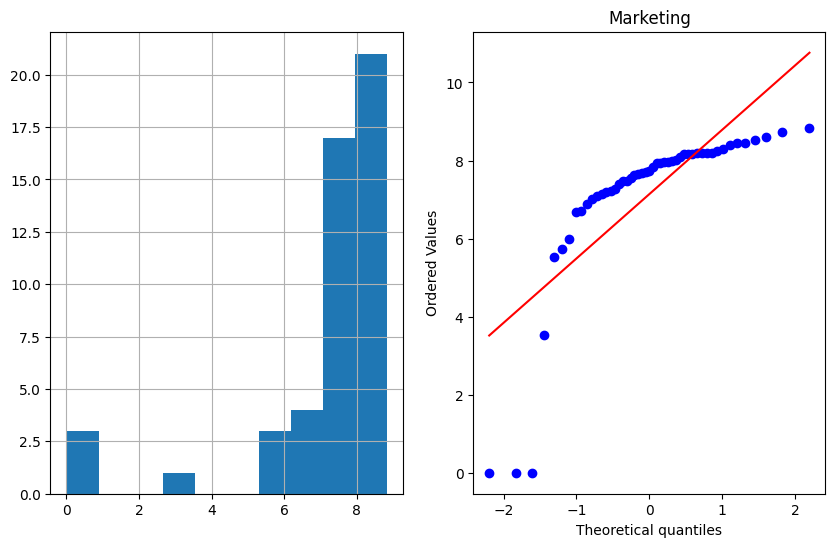

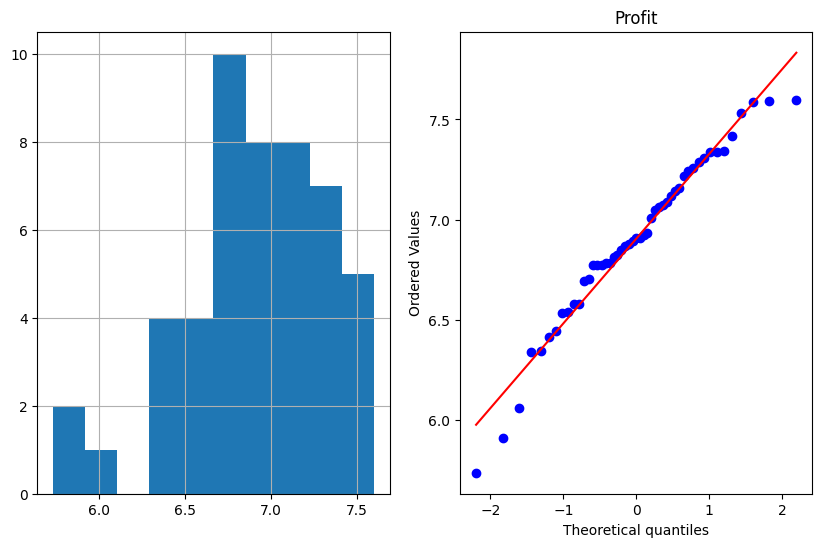

In [36]:
df_cbrt=df3.copy()
df_cbrt[continuous_feature]=np.cbrt(df_sqrt[continuous_feature])
plot_data(df_cbrt,'R&D Spend')
plt.title('R&D Spend')
plot_data(df_cbrt,'Administration')
plt.title('Administration')
plot_data(df_cbrt,'Marketing Spend')
plt.title('Marketing')
plot_data(df_cbrt,'Profit')
plt.title('Profit')


In [37]:
df3.State.value_counts()

New York      17
California    16
Florida       16
Name: State, dtype: int64

## The Shapiro-Wilk test is a test of normality. It is used to determine whether or not a sample comes from a normal distribution.

To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function, which takes on the following syntax:

In [38]:
df3.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [39]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
print('R&D Spend feature', shapiro(df3['R&D Spend']), '\n'
      'Administration feature', shapiro(df3['Administration']), '\n'
      'Marketing Spend feature', shapiro(df3['Marketing Spend']), '\n'
      'Profit feature', shapiro(df3['Profit']))


R&D Spend feature ShapiroResult(statistic=0.9705320596694946, pvalue=0.25422945618629456) 
Administration feature ShapiroResult(statistic=0.9695430994033813, pvalue=0.23222042620182037) 
Marketing Spend feature ShapiroResult(statistic=0.9757171273231506, pvalue=0.4016808867454529) 
Profit feature ShapiroResult(statistic=0.9793393015861511, pvalue=0.5378792881965637)


### Observation: Since the p-values are not less than .05, we fail to reject the null hypothesis.

Visualizing the Relation between each independent Feature with respect to the Dependent Feature

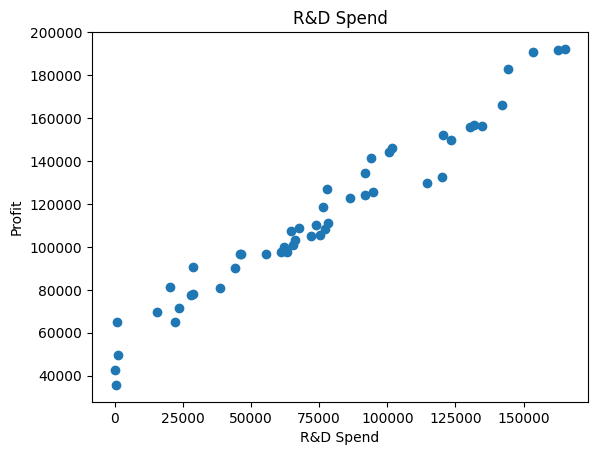

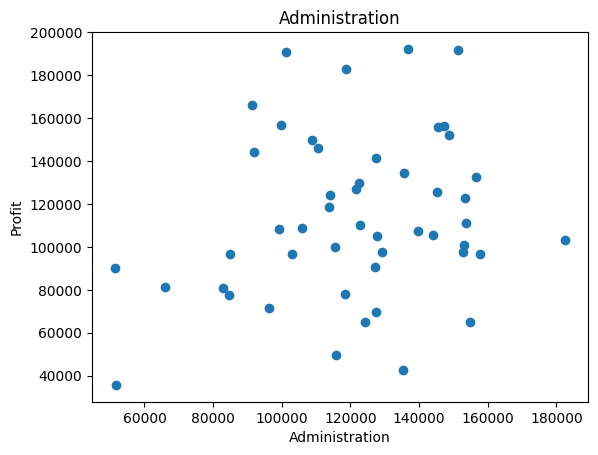

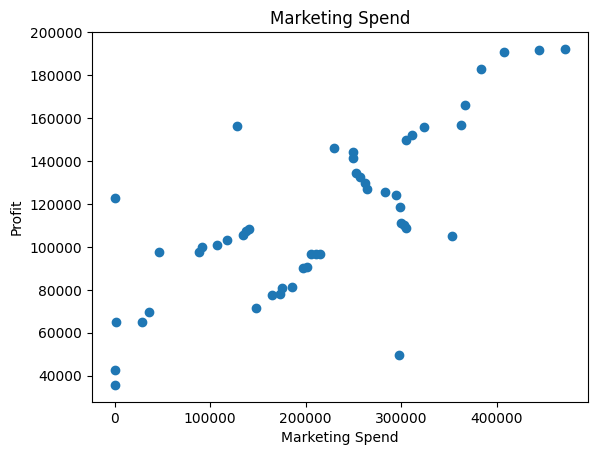

In [40]:
for feature in continuous_feature:
    if feature!="Profit":
        data=df3.copy()
        plt.scatter(data[feature],data['Profit'])
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.title(feature)
        plt.show()

Observation: R&D feature has a good linear relation with Profit as compare to other features

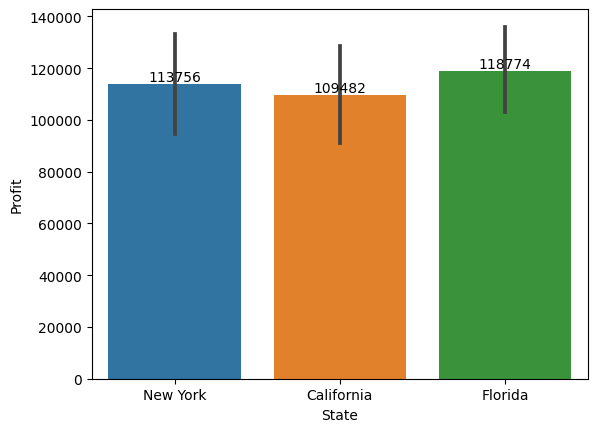

In [41]:
ax = sns.barplot(x = "State", y = 'Profit', data = df3)
for i in ax.containers:
    ax.bar_label(i,)

Observation:There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation

In [42]:
df4=df3.drop('State',axis=1)
df4.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [43]:
df4.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


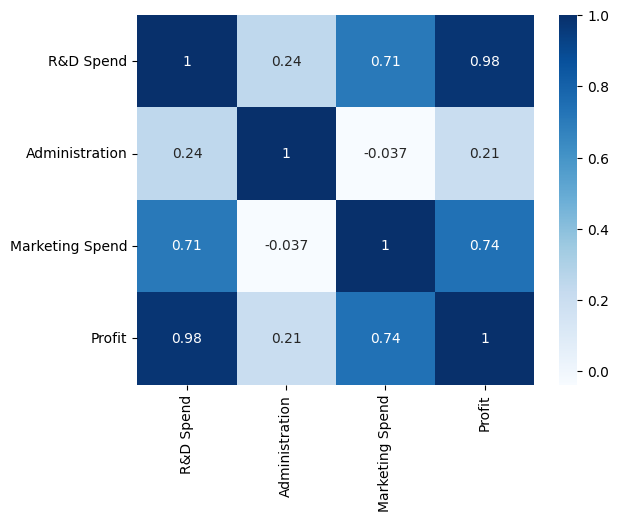

In [44]:
ax = sns.heatmap(df4.corr(),annot=True,cmap='Blues')

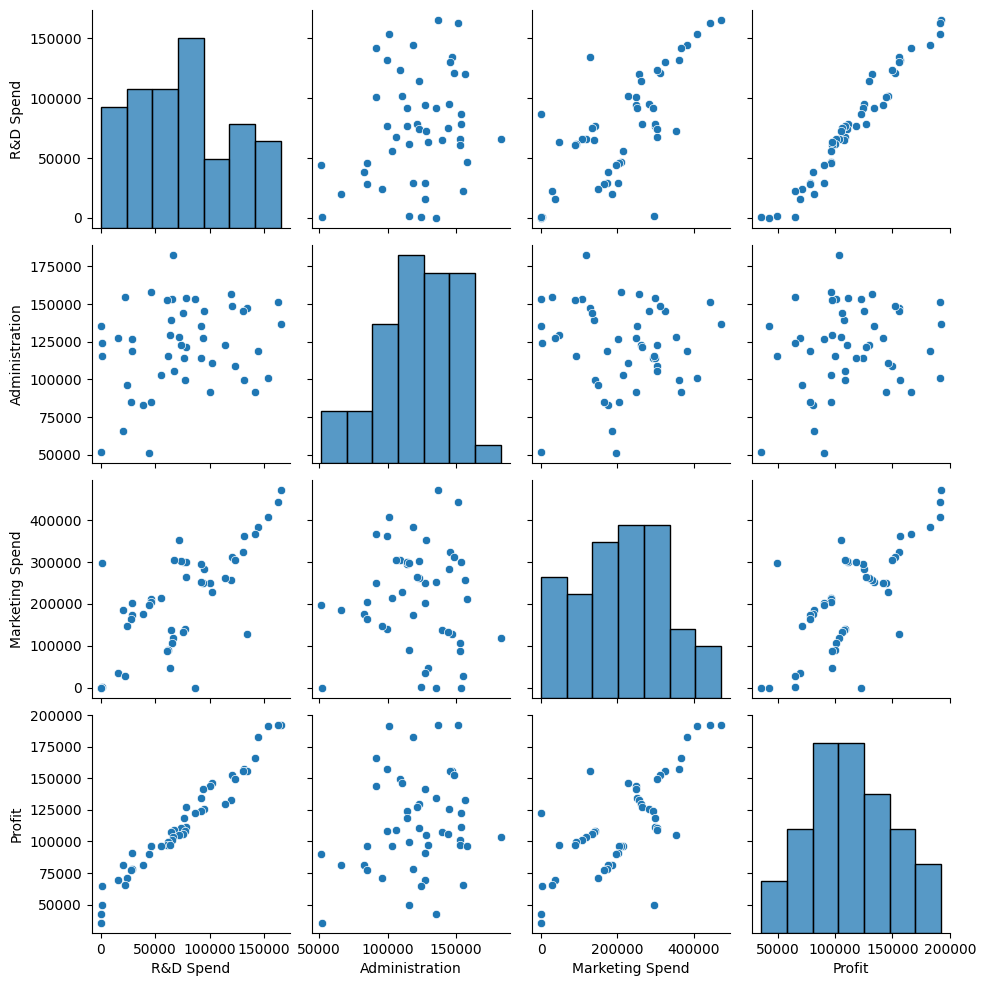

In [45]:
# Creating pairplot
sns.pairplot(df4[['R&D Spend','Administration','Marketing Spend','Profit']])

## Feature Engineering
Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores

In [46]:
df_standard_scaled = df4.copy()
features = df_standard_scaled[continuous_feature]

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401


Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'

In [48]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 R&D Spend          0.0
Administration    -0.0
Marketing Spend   -0.0
Profit            -0.0
dtype: float64 
Standard Devaition 
 R&D Spend          1.0
Administration     1.0
Marketing Spend    1.0
Profit             1.0
dtype: float64 1


# Building Multiple Linear Regression Model
### Preparing a model



In [49]:
model = smf.ols("Profit ~ Q('R&D Spend') + Administration + Q('Marketing Spend')", data = df_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           8.85e-32
Time:                        12:57:46   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1.419e-16      0.029  -4.84e-15      1.000      -0.059       0.059
Q('R&D Spend')           0.9254      0.045     20.470      0.000       0.834       1.017
Administration          -0.0165      0.032     -0.518      0.607      -0.080       0.048
Q('Marketing Spend')     0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Testing
### As ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)
### Finding Coefficient Parameters (Beta0 and Beta1's values)

In [50]:
# Finding Coefficient parameters
model.params

Intercept              -1.419157e-16
Q('R&D Spend')          9.254411e-01
Administration         -1.646059e-02
Q('Marketing Spend')    8.009988e-02
dtype: float64

In [51]:
# Finding tvalues and pvalues
display(np.round(model.tvalues,3), np.round(model.pvalues,3))

Intercept               -0.000
Q('R&D Spend')          20.470
Administration          -0.518
Q('Marketing Spend')     1.825
dtype: float64

Intercept               1.000
Q('R&D Spend')          0.000
Administration          0.607
Q('Marketing Spend')    0.075
dtype: float64

Here,
(Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

^Observation:
1.(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

2.(RnD) Beta1: tvalue=20.470, pvalue= 0.000

3.(admin) Beta2: tvalue=-0.518, pvalue= 0.607

4.(marketing) Beta3: tvalue=1.825, pvalue= 0.075

5.If (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(RnD) variable has good slope and variance w.r.t Y(profit) variable.

6.If (pvalue=0)>(α=0.05); We fail to reject Null hyp. Thus, X1(admin) and X2(marketing) variable doesn't have good slope

7.Until further tests

Note: Simple Linear Regression to separately check the dependency between those feature with Target feature

compare models by their R-Squared and p_values.

In [52]:
admin_slr_model = smf.ols("Profit~Administration", data = df_standard_scaled).fit()

In [53]:
# Finding rsquared values
admin_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Mon, 25 Dec 2023   Prob (F-statistic):              0.156
Time:                        12:57:46   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.113e-16      0.143  -1.48e-15      1.000      -0.287       0.287
Administration     0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Finding tvalues and pvalues
display(np.round(admin_slr_model.tvalues,3), np.round(admin_slr_model.pvalues,3))

Intercept        -0.000
Administration    1.442
dtype: float64

Intercept         1.000
Administration    0.156
dtype: float64

(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

(admin) Beta1: tvalue=1.442, pvalue= 0.156

If (pvalue=0)<(α=0.05); Reject Null hyp.

If (pvalue=0)>(α=0.05); We fail to reject Null hyp. Thus, X(admin) variable doesn't has good slope

Until further tests

In [55]:
marketing_slr_model = smf.ols("Profit~Q('Marketing Spend')", data = df_standard_scaled).fit()

In [56]:
# Finding rsquared values
marketing_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.30e-09
Time:                        12:57:46   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.113e-16      0.098  -2.15e-15      1.000      -0.198       0.198
Q('Marketing Spend')     0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Finding tvalues and pvalues
display(np.round(marketing_slr_model.tvalues,3), np.round(marketing_slr_model.pvalues,3))

Intercept              -0.000
Q('Marketing Spend')    7.527
dtype: float64

Intercept               1.0
Q('Marketing Spend')    0.0
dtype: float64

### Observation:
1.(Intercept) Beta0: tvalue=-0.000 , pvalue=1.000

2.(marketing) Beta1: tvalue=7.527, pvalue= 0.0

3.If (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(marketing) variable has good slope

4.If (pvalue=0)>(α=0.05); We fail to reject Null hyp.

5.Until further tests

In [58]:
# So if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 58% right?
# lets check
admin_plus_marketing= smf.ols("Profit~Administration + Q('Marketing Spend')", data =df_standard_scaled).fit()
# Finding rsquared values
admin_plus_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           6.59e-10
Time:                        12:57:46   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.113e-16      0.093  -2.27e-15      1.000      -0.187       0.187
Administration           0.2337      0.093      2.508      0.016       0.046       0.421
Q('Marketing Spend')     0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VARIANCE INFLATION FACTOR

In [59]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['Marketing Spend','Administration','R&D Spend']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,Administration,4.218831
0,Marketing Spend,7.589312
2,R&D Spend,8.602235


In [60]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df4[['Marketing Spend','R&D Spend']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,Marketing Spend,7.186744
1,R&D Spend,7.186744


Build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters

In [61]:
admin_present_model= smf.ols("Profit ~ Q('R&D Spend') + Administration", data= df_standard_scaled).fit()
admin_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           1.69e-32
Time:                        12:57:46   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.113e-16      0.030  -7.03e-15      1.000      -0.060       0.060
Q('R&D Spend')     0.9868      0.031     31.847      0.000       0.924       1.049
Administration    -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

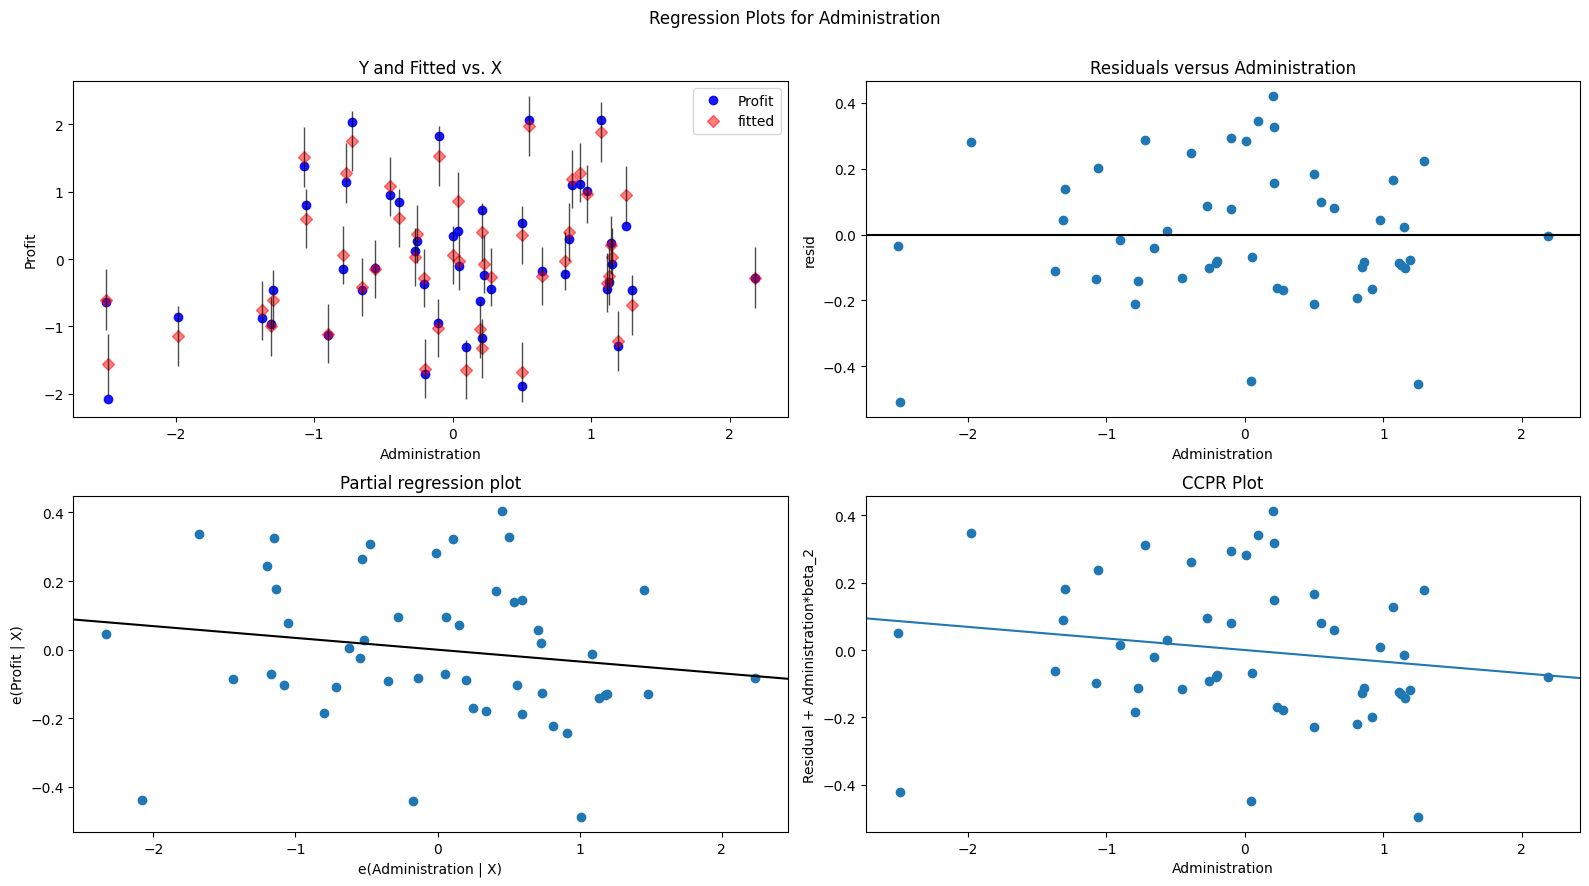

In [62]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
sm.graphics.plot_regress_exog(admin_present_model, 'Administration', fig=fig)
plt.show()


In [63]:
marketing_present_model= smf.ols("Profit ~ Q('R&D Spend') + Q('Marketing Spend')", data= df_standard_scaled).fit()
marketing_present_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           3.74e-33
Time:                        12:57:47   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.113e-16      0.029  -7.26e-15      1.000      -0.059       0.059
Q('R&D Spend')           0.9164      0.041     22.136      0.000       0.833       1.000
Q('Marketing Spend')     0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you're fitting a model
marketing_present_model = smf.ols("Profit ~ Q('Marketing Spend')", data=Startups).fit()

# Print model summary to check variable names
print(marketing_present_model.summary())




                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        13:03:04   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                 6e+04 

In [78]:
only_RnD_model= smf.ols("Profit~Q('R&D Spend')", data= df_standard_scaled).fit()
only_RnD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           7.56e-34
Time:                        13:07:18   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
Q('R&D Spend')     0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you're fitting a model
marketing_present_model = smf.ols("Profit ~ Q('R&D Spend')", data=Startups).fit()

# Print model summary to check variable names
print(marketing_present_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           3.50e-32
Time:                        13:10:06   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.903e+04   2537.897     19.

Let's compare the residuals of both the models to come up with an conclusion

Model Validation

Comparing different models with respect to their Root Mean Squared Errors

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [86]:
df4.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

### **Using all features**

In [88]:
x = df4.drop('Profit', axis = 1).values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)


In [89]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [90]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [91]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956572
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336136
RMSE using all features:  8385.783571480788


### **Using R&D Spend and Marketing Features**

In [92]:
x = df4.drop(['Profit','Administration'],axis=1).values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)


In [93]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 2)
Shape of X_test:  (13, 2)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [94]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train_scal, y_train_scal)

LinearRegression()

In [95]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_and_marketing_train)
print('R2_score (test): ', r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature: ", rmse_linear_using_RnD_and_marketing)

CV:  0.9114070932851247
R2_score (train):  0.9643536571553787
R2_score (test):  0.939185037123506
RMSE using RnD and Marketing feature:  8059.317765282762


### **Using Only R&D Spend feature**

In [96]:
x = df4.iloc[:,:1].values
y = df4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)


In [97]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 1)
Shape of X_test:  (13, 1)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [98]:
from sklearn.preprocessing import StandardScaler

#Scaling
transformer_x = StandardScaler().fit(x_train)
transformer_y = StandardScaler().fit(y_train)
x_train_scal = transformer_x.transform(x_train)
x_test_scal = transformer_x.transform(x_test)
y_train_scal = transformer_y.transform(y_train)
y_test_scal = transformer_y.transform(y_test)

#Linear Regression
regressor_linear_using_rnd = LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal, y_train_scal)

LinearRegression()

In [99]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear_using_rnd, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE on Test set results
rmse_linear_using_only_RnD = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_train)
print('R2_score (test): ', r2_score_rnd_test)
print("RMSE using only RnD feature: ", rmse_linear_using_only_RnD)

CV:  0.8900789292733178
R2_score (train):  0.957733077239081
R2_score (test):  0.9521017609333128
RMSE using only RnD feature:  7152.417057875889


Comparing Root Mean Square Error and Mininum Value

In [101]:
rmse_compare = {'Using All Features Model': rmse_linear_using_all_features,'Using RnD and Marketing Feature Model': rmse_linear_using_RnD_and_marketing, 'Using only R&D Spend Feauture Model': rmse_linear_using_only_RnD}
min(rmse_compare, key=rmse_compare.get)

'Using only R&D Spend Feauture Model'

The Model that was build without using Administration and Marketing feature performed very well.

Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared and highest linear relation

In [105]:
final_model = smf.ols("Profit~Q('R&D Spend')", data=df_standard_scaled).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           7.56e-34
Time:                        13:22:50   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.113e-16      0.030  -7.01e-15      1.000      -0.061       0.061
Q('R&D Spend')     0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(df4['R&D Spend'].values.reshape(-1,1))

# Predict with the trained model
prediction = regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

In [116]:
predicted = pd.DataFrame(prediction_unscaled, columns=['Predicted_Profit'])
predicted['Profit'] = df4.Profit
predicted['R&D Spend'] = df4['R&D Spend']
predicted

,Predicted_Profit,Profit,R&D Spend
0,188741.633166,192261.83,165349.20
1,186461.632949,191792.06,162597.70
2,178874.456794,191050.39,153441.51
3,171359.446810,182901.99,144372.41
4,169482.521463,166187.94,142107.34
5,161005.179859,156991.12,131876.90
6,163274.457488,156122.51,134615.46
7,159696.949460,155752.60,130298.13
8,151613.070514,152211.77,120542.52
9,153926.928921,149759.96,123334.88


In [120]:
models={'Different_Models':['Raw_data','Median_Imputation_Outlier','Mean_Imputation_outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[raw_model.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[raw_model.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,model.rsquared_adj,marketing_present_model.rsquared_adj,only_RnD_model.rsquared_adj],
       'RMSE':[np.sqrt(raw_model.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_data,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Using All Features Model,0.965020,0.958737,8385.783571
4,Using RnD and Marketing Feature Model,0.964354,0.945421,8059.317765
5,Using only R&D Feauture Model,0.957733,0.956432,7152.417058
